In [1115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error
import xgboost
import catboost as cb
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import ElasticNet
from vecstack import stacking
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor


In [1116]:
train = pd.read_csv(r'C:\Users\dell15\genpact\train.csv')
meal_info = pd.read_csv(r'C:\Users\dell15\genpact\meal_info.csv')
fullfill = pd.read_csv(r'C:\Users\dell15\genpact\fulfilment_center_info.csv')

In [1117]:
train = train.merge(fullfill,on='center_id',how='left')


In [1118]:
train = train.merge(meal_info,on = 'meal_id',how='left')

In [1119]:
test = pd.read_csv(r'C:\Users\dell15\genpact\test_QoiMO9B.csv')


In [1120]:
test = test.merge(fullfill , on = 'center_id',how='left')

In [1121]:

test = test.merge(meal_info ,  on = 'meal_id',how='left')

In [1122]:
def profit_total(col1 , col2):
    profit = col2 - col1
    return profit
profit = profit_total(train['base_price'],train['checkout_price'])
train['profit'] = profit
profit_test = profit_total(test['base_price'],test['checkout_price'])
test['profit'] = profit_test

In [1123]:
def discount_col(col1 , col2):
    x = col1-col2
    y = (x/col2)*100
    return (y)
disc =discount_col(train['checkout_price'],train['base_price'])
train['discount'] = disc
disc_test = discount_col(test['checkout_price'],test['checkout_price'])
test['discount'] = disc_test

In [1124]:
le = preprocessing.LabelEncoder()
train['center_id'] = le.fit_transform(train['center_id'])
test['center_id'] = le.transform(test['center_id'])
train['meal_id'] = le.fit_transform(train['meal_id'])
test['meal_id'] = le.transform(test['meal_id'])
#train['city_code'] = le.fit_transform(train['city_code'])
#test['city_code'] = le.transform(test['city_code'])
#train['region_code'] = le.fit_transform(train['region_code'])
#test['region_code'] = le.transform(test['region_code'])

In [1125]:
one_hot_data = pd.concat([train, pd.get_dummies(train['center_type'])], axis=1)
one_hot_data = one_hot_data.drop('center_type', axis=1)
train = one_hot_data[:]


one_hot_data = pd.concat([test, pd.get_dummies(test['center_type'])], axis=1)
one_hot_data = one_hot_data.drop('center_type', axis=1)
test = one_hot_data[:]


one_hot_data = pd.concat([train, pd.get_dummies(train['category'])], axis=1)
one_hot_data = one_hot_data.drop('category', axis=1)
train = one_hot_data[:]

one_hot_data = pd.concat([test, pd.get_dummies(test['category'])], axis=1)
one_hot_data = one_hot_data.drop('category', axis=1)
test = one_hot_data[:]

one_hot_data = pd.concat([train, pd.get_dummies(train['cuisine'])], axis=1)
one_hot_data = one_hot_data.drop('cuisine', axis=1)
train = one_hot_data[:]

one_hot_data = pd.concat([test, pd.get_dummies(test['cuisine'])], axis=1)
one_hot_data = one_hot_data.drop('cuisine', axis=1)
test = one_hot_data[:]



In [1126]:


#train.center_type=train.center_type.astype(np.object)
#test.center_type=test.center_type.astype(np.object)
#categorical_features_indices = np.where(X_train.dtypes =='object')[0]
'''one_hot_data = pd.concat([train, pd.get_dummies(train['region_code'])], axis=1)
one_hot_data = one_hot_data.drop('region_code', axis=1)
train = one_hot_data[:]

one_hot_data = pd.concat([test, pd.get_dummies(test['region_code'])], axis=1)
one_hot_data = one_hot_data.drop('region_code', axis=1)
test = one_hot_data[:]

one_hot_data = pd.concat([train, pd.get_dummies(train['city_code'])], axis=1)
one_hot_data = one_hot_data.drop('city_code', axis=1)
train = one_hot_data[:]

one_hot_data = pd.concat([test, pd.get_dummies(test['city_code'])], axis=1)
one_hot_data = one_hot_data.drop('city_code', axis=1)
test = one_hot_data[:]
'''


"one_hot_data = pd.concat([train, pd.get_dummies(train['region_code'])], axis=1)\none_hot_data = one_hot_data.drop('region_code', axis=1)\ntrain = one_hot_data[:]\n\none_hot_data = pd.concat([test, pd.get_dummies(test['region_code'])], axis=1)\none_hot_data = one_hot_data.drop('region_code', axis=1)\ntest = one_hot_data[:]\n\none_hot_data = pd.concat([train, pd.get_dummies(train['city_code'])], axis=1)\none_hot_data = one_hot_data.drop('city_code', axis=1)\ntrain = one_hot_data[:]\n\none_hot_data = pd.concat([test, pd.get_dummies(test['city_code'])], axis=1)\none_hot_data = one_hot_data.drop('city_code', axis=1)\ntest = one_hot_data[:]\n"

In [1127]:

#df['color'] = np.where(df['Set']=='Z', 'green', 'red')
train['advanced'] = [1 if x >= 3.5 else 0 for x in train['op_area']]
test['advanced'] = [1 if x >= 3.5 else 0 for x in test['op_area']]


C:\Users\dell15\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [1128]:
def popular_week(col1,col2,col3):
    col4 = col1*col2*col3
    return col4

popular_week_train = popular_week(train['week'],train['emailer_for_promotion'],train['homepage_featured'])
popular_week_test = popular_week(test['week'],test['emailer_for_promotion'],test['homepage_featured'])

train['is_pop'] = popular_week_train
test['is_pop'] = popular_week_test



C:\Users\dell15\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [1129]:
''' def square(col1):
    col3 = col1*col1
    return col3

#square_prof = square(train['profit'])
square_disc = square(train['discount'])

square_prof_test = square(test['profit'])
square_disc_test = square(test['profit'])

train['square_profit'] = square_prof
train['square_discount'] = square_disc
'''

#test['square_profit'] = square_prof_test
#test['square_discount'] = square_disc_test


" def square(col1):\n    col3 = col1*col1\n    return col3\n\n#square_prof = square(train['profit'])\nsquare_disc = square(train['discount'])\n\nsquare_prof_test = square(test['profit'])\nsquare_disc_test = square(test['profit'])\n\ntrain['square_profit'] = square_prof\ntrain['square_discount'] = square_disc\n"

In [1130]:
#one_hot_data = pd.concat([train, pd.get_dummies(train['week'])], axis=1)
#one_hot_data = one_hot_data.drop('week', axis=1)
#train = one_hot_data[:]

#one_hot_data = pd.concat([test, pd.get_dummies(test['week'])], axis=1)
#one_hot_data = one_hot_data.drop('week', axis=1)
#test = one_hot_data[:]
    

In [1131]:
target = train['num_orders']
train = train.drop(['num_orders','id'],axis=1)
test.drop(['id'],axis=1,inplace=True)

C:\Users\dell15\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [1132]:
def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0: #check for negative values
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return (sum/len(predicted))**0.5

In [1038]:
X_train,X_val,y_train,y_val = train_test_split(train,target)

In [788]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 39 columns):
id                       456548 non-null int64
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
num_orders               456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
op_area                  456548 non-null float64
profit                   456548 non-null float64
discount                 456548 non-null float64
TYPE_A                   456548 non-null uint8
TYPE_B                   456548 non-null uint8
TYPE_C                   456548 non-null uint8
Beverages                456548 non-null uint8
Biryani                  456548 n

In [ ]:
rice bowl , sandwich , italian

In [1133]:
def popularity(col1,col2,col3):
    col4 = col1*col2*col3
    return col4

def email_pop(col1,col2):
    col3 = col1*col2
    return col3

rice_promo_train = popularity(train['Rice Bowl'], train['emailer_for_promotion'],train['homepage_featured']) 
rice_promo_test = popularity(test['Rice Bowl'], test['emailer_for_promotion'],test['homepage_featured'])

italian_promo_train = popularity(train['Italian'], train['emailer_for_promotion'],train['homepage_featured']) 
italian_promo_test = popularity(test['Italian'], test['emailer_for_promotion'],test['homepage_featured'])

sandwich_promo_train = popularity(train['Sandwich'], train['emailer_for_promotion'],train['homepage_featured']) 
sandiwch_promo_test = popularity(test['Sandwich'], test['emailer_for_promotion'],test['homepage_featured'])

mel_op_tr = email_pop(train['op_area'],train['meal_id'])
mel_op_test = email_pop(test['op_area'],test['meal_id'])

cen_op_tr = email_pop(train['op_area'],train['center_id'])
cen_op_test = email_pop(test['op_area'],test['center_id'])

In [1134]:
def root(col1):
    col2 = np.sqrt(col1)
    return col2
sqrt_check = root(train['checkout_price'])
sqrt_check_test = root(test['checkout_price'])

sqrt_base = root(train['base_price'])
sqrt_base_test = root(test['base_price'])

In [1135]:
train['sqrt_check'] = sqrt_check
test['sqrt_check'] = sqrt_check_test

train['base_check'] = sqrt_base
test['base_check'] = sqrt_base_test

C:\Users\dell15\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell15\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [1136]:
train['rice_promo'] = rice_promo_train
test['rice_promo'] = rice_promo_test

train['italian_promo'] = italian_promo_train
test['italian_promo'] = italian_promo_test

train['sandwich_promo'] = sandwich_promo_train
test['sandwich_promo'] = sandiwch_promo_test

train['meal_op'] = mel_op_tr
test['meal_op'] = mel_op_test

train['cent_op'] = cen_op_tr
test['cent_op'] = cen_op_test

C:\Users\dell15\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\dell15\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\dell15\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.ht

In [1137]:
train.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,Thai,advanced,is_pop,sqrt_check,base_check,rice_promo,italian_promo,sandwich_promo,meal_op,cent_op
0,1,23,22,136.83,152.29,0,0,647,56,2.0,...,1,0,0,11.697436,12.340583,0,0,0,44.0,46.0
1,1,23,26,136.83,135.83,0,0,647,56,2.0,...,1,0,0,11.697436,11.654613,0,0,0,52.0,46.0
2,1,23,38,134.86,135.86,0,0,647,56,2.0,...,1,0,0,11.612924,11.655900,0,0,0,76.0,46.0
3,1,23,29,339.50,437.53,0,0,647,56,2.0,...,0,0,0,18.425526,20.917218,0,0,0,58.0,46.0
4,1,23,42,243.50,242.50,0,0,647,56,2.0,...,0,0,0,15.604487,15.572412,0,0,0,84.0,46.0


In [1102]:
models = [
    # LinearRegression(),
    #ElasticNet(random_state=0),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    #DecisionTreeRegressor(),
    #linear_model.LassoLars(alpha=.1),
    #BayesianRidge(compute_score=True),
    #linear_model.Ridge(alpha=.5),
    #cb.CatBoostRegressor(max_depth=11, learning_rate=0.005, iterations=1000, early_stopping_rounds=50),
   # XGBRegressor(random_state=0, n_jobs=-1, learning_rate=0.1, 
                 #n_estimators=100, max_depth=3)
    #XGBRegressor(objective= 'reg:linear',
   # max_depth= 6,
   # learning_rate= .01),
    #RandomForestRegressor(),
    KNeighborsRegressor(n_neighbors = 5),
    #RandomForestRegressor()
    #LinearRegression()
    #cb.CatBoostRegressor(max_depth=11, learning_rate=0.005, eval_metric = 'RMSE', iterations=100, early_stopping_rounds=50)
    
]

In [1044]:
S_train, S_test = stacking(models,                     # list of models
                           train, target, test,   # data
                           regression=True,            # regression task (if you need 
                                                       #     classification - set to False)
                           mode='oof_pred_bag',        # mode: oof for train set, predict test 
                                                       #     set in each fold and find mean
                           save_dir=None,              # do not save result and log (to save 
                                                       #     in current dir - set to '.')
                           metric=rmsle, # metric: callable
                           n_folds=3,                  # number of folds
                           shuffle=True,               # shuffle the data
                           random_state=0,             # ensure reproducibility
                           verbose=2)

task:         [regression]
metric:       [rmsle]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [ExtraTreesRegressor]
    fold  0:  [0.54182668]
    fold  1:  [0.54234003]
    fold  2:  [0.54084548]
    ----
    MEAN:     [0.54167073] + [0.00062003]
    FULL:     [0.54167109]

model  1:     [RandomForestRegressor]
    fold  0:  [0.51109613]
    fold  1:  [0.51276552]
    fold  2:  [0.51147745]
    ----
    MEAN:     [0.51177970] + [0.00071425]
    FULL:     [0.51178020]

model  2:     [KNeighborsRegressor]
    fold  0:  [0.63271877]
    fold  1:  [0.63431319]
    fold  2:  [0.63078586]
    ----
    MEAN:     [0.63260594] + [0.00144223]
    FULL:     [0.63260759]



In [201]:
#train['LR'] = S_train[:,0]


In [876]:
train['ET'] = S_train[:,0]
train['RF'] = S_train[:,1]
train['knn'] = S_train[:,2]
#train['Catboost']=S_train[:,2]
#train['Xgb1']=S_train[:,4]
#train['Xgb2']=S_train[:,5]
#train['Knn']=S_train[:,3]
#train['LR']=S_train[:,7]

In [877]:
#test.head()

In [878]:
test['ET']=S_test[:,0]
test['RF']=S_test[:,1]
test['knn'] = S_test[:,2]
#test['Ridge']=S_test[:,2]
#test['Catboost']=S_test[:,2]
#test['Xgb1']=S_test[:,4]
#test['Xgb2']=S_test[:,5]
#test['Knn']=S_test[:,3]
#test['LR']=S_test[:,4]

C:\Users\dell15\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\dell15\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [879]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 43 columns):
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
op_area                  456548 non-null float64
profit                   456548 non-null float64
discount                 456548 non-null float64
TYPE_A                   456548 non-null uint8
TYPE_B                   456548 non-null uint8
TYPE_C                   456548 non-null uint8
Beverages                456548 non-null uint8
Biryani                  456548 non-null uint8
Desert                   456548 non-null uint8
Extras                   456548 n

In [1138]:
def email_pop(col1,col2):
    col3 = col1*col2
    return col3
def home_pop(col1,col2):
    col3 = col1*col2
    return col3

In [1139]:
email =email_pop(train['emailer_for_promotion'],train['meal_id'])
train['email_pop'] = email
email_test =email_pop(test['emailer_for_promotion'],test['meal_id'])
test['email_pop'] = email_test


f1 =email_pop(train['op_area'],train['checkout_price'])
train['f1'] = f1
f1_test =email_pop(test['op_area'],test['checkout_price'])
test['f1'] = f1_test

C:\Users\dell15\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\dell15\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [1104]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 44 columns):
week                     456548 non-null int64
center_id                456548 non-null int64
meal_id                  456548 non-null int64
checkout_price           456548 non-null float64
base_price               456548 non-null float64
emailer_for_promotion    456548 non-null int64
homepage_featured        456548 non-null int64
city_code                456548 non-null int64
region_code              456548 non-null int64
op_area                  456548 non-null float64
profit                   456548 non-null float64
discount                 456548 non-null float64
TYPE_A                   456548 non-null uint8
TYPE_B                   456548 non-null uint8
TYPE_C                   456548 non-null uint8
Beverages                456548 non-null uint8
Biryani                  456548 non-null uint8
Desert                   456548 non-null uint8
Extras                   456548 n

In [1140]:
#import xgboost as xgb
from sklearn.decomposition import PCA

In [1141]:
#dtrain = xgb.DMatrix('../data/agaricus.txt.train')
pca = PCA(n_components=2)
train_features = pca.fit_transform(train)

In [1142]:
model = RandomForestRegressor()
# Fit 2nd level model
model = model.fit(train_features, target)

In [1143]:
test_features = pca.fit_transform(test)

In [1144]:
y_pred = model.predict(test_features)

In [224]:
#error = rmsle(y_test,y_pred)

In [ ]:
print(error)

In [ ]:
test_id = pd.read_csv(r'C:\Users\dell15\genpact\test_QoiMO9B.csv')


In [1145]:
submission = pd.DataFrame({
        "id": test_id.id,
        "num_orders": y_pred
})

submission.to_csv(r'C:\Users\dell15\Desktop\aparkas\ensemble_starter_ykbh.csv',index=False)
submission.head()

,id,num_orders
0,1028232,102.4
1,1127204,52.9
2,1212707,84.8
3,1082698,135.0
4,1400926,153.9


In [213]:
X_train, X_test, y_train, y_test = train_test_split(
    train, target, test_size=0.1, random_state=42
)

In [52]:
y_pred_cb = modelX.predict(test)

In [53]:
submission = pd.DataFrame({
        "id": test_id.id,
        "num_orders": y_pred
})

submission.to_csv(r'C:\Users\dell15\Desktop\aparkas\ensemble_starter_2.csv',index=False)
submission.head()

,id,num_orders
0,1028232,224.4
1,1127204,278.2
2,1212707,148.4
3,1082698,54.2
4,1400926,44.0


In [810]:
from xgboost import plot_importance
from matplotlib import pyplot
from xgboost import XGBRegressor

In [1111]:
model_xg = XGBRegressor()
model_xg.fit(train, target)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

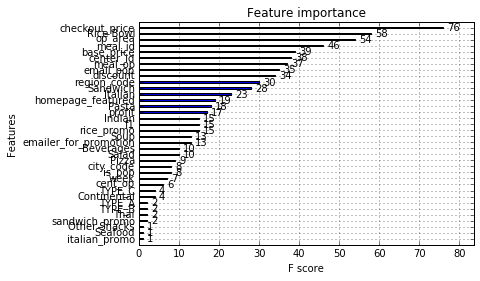

In [1112]:
plot_importance(model_xg)
pyplot.show()

In [1047]:
train.head()

,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,city_code,region_code,op_area,...,Italian,Thai,advanced,is_pop,sqrt_check,base_check,rice_promo,italian_promo,sandwich_promo,meal_op
0,1,23,22,136.83,152.29,0,0,647,56,2.0,...,0,1,0,0,11.697436,12.340583,0,0,0,44.0
1,1,23,26,136.83,135.83,0,0,647,56,2.0,...,0,1,0,0,11.697436,11.654613,0,0,0,52.0
2,1,23,38,134.86,135.86,0,0,647,56,2.0,...,0,1,0,0,11.612924,11.655900,0,0,0,76.0
3,1,23,29,339.50,437.53,0,0,647,56,2.0,...,0,0,0,0,18.425526,20.917218,0,0,0,58.0
4,1,23,42,243.50,242.50,0,0,647,56,2.0,...,0,0,0,0,15.604487,15.572412,0,0,0,84.0


In [1077]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32573 entries, 0 to 32572
Data columns (total 44 columns):
week                     32573 non-null int64
center_id                32573 non-null int64
meal_id                  32573 non-null int64
checkout_price           32573 non-null float64
base_price               32573 non-null float64
emailer_for_promotion    32573 non-null int64
homepage_featured        32573 non-null int64
city_code                32573 non-null int64
region_code              32573 non-null int64
op_area                  32573 non-null float64
profit                   32573 non-null float64
discount                 32573 non-null float64
TYPE_A                   32573 non-null uint8
TYPE_B                   32573 non-null uint8
TYPE_C                   32573 non-null uint8
Beverages                32573 non-null uint8
Biryani                  32573 non-null uint8
Desert                   32573 non-null uint8
Extras                   32573 non-null uint8
Fish   